# Datasets to use for the project

In [47]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import utils
pd.set_option('display.max_columns', None)

In [48]:
#pd.set_option('display.max_columns', None)
#plt.rcParams['figure.figsize'] = (8, 6)
#sns.set_context("notebook", font_scale=1.1)

In [49]:
#1 tracks.csv
tracks = pd.read_csv('global_track.csv', index_col=0)
tracks = tracks.loc[tracks.track_genre_top != 'Mixed',:]
tracks

,album_comments,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_title,album_tracks,album_type,artist_comments,artist_favorites,artist_id,artist_members,artist_tags,set_split,set_subset,track_bit_rate,track_comments,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_listens
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,2008.0,0,4,1,6073,0,AWOL - A Way Of Life,7,Album,0,9,1,0,['awol'],training,small,256000,0,168,2,Hip-Hop,[21],[21],4656,1293
3,0,2008.0,0,4,1,6073,0,AWOL - A Way Of Life,7,Album,0,9,1,0,['awol'],training,medium,256000,0,237,1,Hip-Hop,[21],[21],1470,514
5,0,2008.0,0,4,1,6073,0,AWOL - A Way Of Life,7,Album,0,9,1,0,['awol'],training,small,256000,0,206,6,Hip-Hop,[21],[21],1933,1151
10,0,2008.0,0,4,6,47632,0,Constant Hitmaker,2,Album,3,74,6,0,"['philly', 'kurt vile']",training,small,192000,0,161,178,Pop,[10],[10],54881,50135
134,0,2008.0,0,4,1,6073,0,AWOL - A Way Of Life,7,Album,0,9,1,0,['awol'],training,medium,256000,0,207,3,Hip-Hop,[21],[21],1126,943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155315,0,2017.0,0,0,22940,1506,1,"Live at Monty Hall, 2/17/2017",6,Live Performance,0,0,24357,0,['spowder'],training,large,320000,0,38,1,Rock,[25],[12],153,128
155316,0,2017.0,0,0,22940,1506,1,"Live at Monty Hall, 2/17/2017",6,Live Performance,0,0,24357,0,['spowder'],training,large,320000,0,162,1,Rock,[25],[12],122,102
155317,0,2017.0,0,0,22940,1506,1,"Live at Monty Hall, 2/17/2017",6,Live Performance,0,0,24357,0,['spowder'],training,large,320000,0,217,1,Rock,[25],[12],194,165


In [50]:
tracks.track_genre_top.value_counts()

Rock                   13994
Experimental           10368
Electronic              8988
Hip-Hop                 3403
Folk                    2726
Pop                     2316
Instrumental            2031
International           1368
Classical               1209
Old-Time / Historic      553
Jazz                     517
Spoken                   418
Country                  194
Soul-RnB                 174
Blues                    105
Easy Listening            24
Name: track_genre_top, dtype: int64

In [51]:
#2 features
features = pd.read_csv('fma_metadata/features.csv',index_col=0, header=[0, 1, 2])
features = features.loc[tracks.index,:]
features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
...                ...       ...       ...       ...       ...       ...   
155315       -0.319850  0.653044  1.300360 -0.606061 -1.109302 -1.006683   
155316       -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317       -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318        0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319       -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103  0.619185  1.038253  1.292235   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
10          1.770694  1.604566  0.521217  1.982386  4.326824  1.300406   
134         1.199204 -0.175223  0.925482  1.438509  0.123328  0.797199   
...              ...       ...       ...       ...       ...       ...   
155315      0.059643  0.472580 -0.856436 -0.524676 -1.239472 -0.036108   
155316     -0.237794  5.695442  0.830353  1.951819 -0.190785 -0.186416   
155317     -0.628103 -0.082687 -0.229483 -0.492753 -0.746905 -0.041635   
155318      1.713526  1.418444  1.325197  0.120333  1.307971 -0.284805   
155319     -0.780860  0.626281 -0.630938 -0.787229  1.402555 -0.673350   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
10          0.461840  0.540411  0.446708  0.647553  0.591908  0.513306   
134         0.670821  0.596978  0.614920  0.535825  0.617804  0.623351   
...              ...       ...       ...       ...       ...       ...   
155315      0.578987  0.630477  0.620290  0.636930  0.704757  0.582936   
155316      0.458839  0.521428  0.706573  0.654298  0.714273  0.697577   
155317      0.535615  0.639617  0.685340  0.632173  0.717913  0.644235   
155318      0.510003  0.608308  0.662439  0.662508  0.712947  0.620948   
155319      0.599551  0.622361  0.571105  0.692349  0.641605  0.684136   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
10          0.651501  0.516887  0.511479  0.478263  0.638766  0.638495   
134         0.643284  0.551302  0.566937  0.6

checking correlation

<AxesSubplot:>

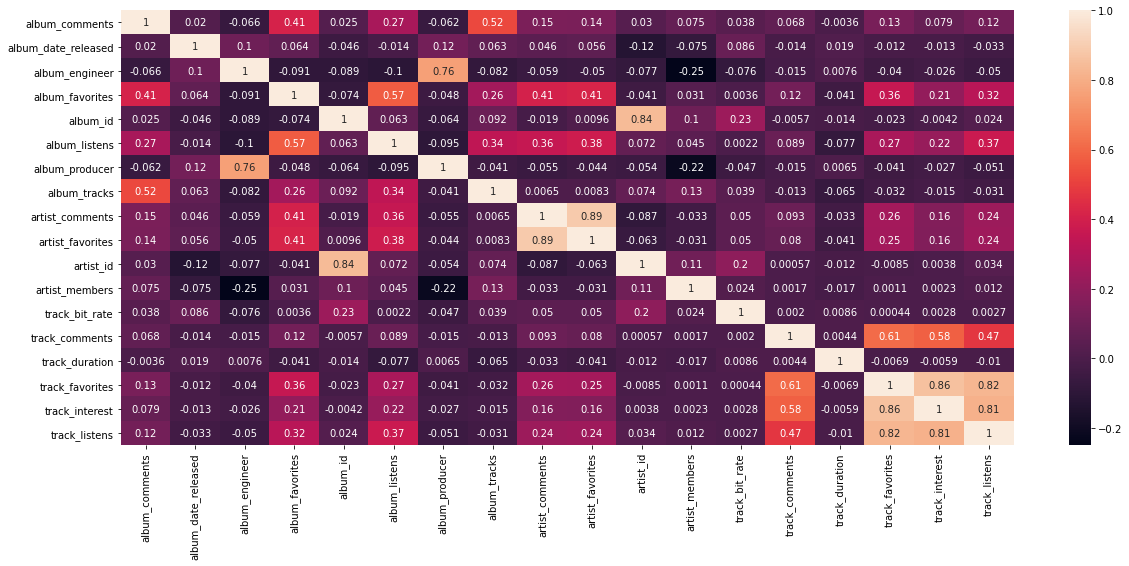

In [52]:
#linear
plt.subplots(figsize=(20,8))
sns.heatmap(tracks.loc[:,list(tracks.select_dtypes(exclude=['object']))].corr(), annot = True)

In [53]:
#dropping redundant variables
tracks = tracks.drop(columns = ['track_comments', 'track_interest', 'track_favorites',
                        'album_id', 'album_title',
                        'artist_comments',
                        'album_comments', 'album_listens', 'album_favorites',
                        'album_engineer'])

In [54]:
X = features.loc[:,('mfcc')]
X = skl.decomposition.PCA(n_components=2).fit_transform(X)
X

array([[-92.13707342,  29.74502759],
       [-92.08802117,  37.95970495],
       [ -5.18716877,  15.69679367],
       ...,
       [ 23.92665853,  -2.14314078],
       [-19.62540663, -19.91440605],
       [-25.72684205, -55.19024439]])

In [55]:
X[:,0]

array([-92.13707342, -92.08802117,  -5.18716877, ...,  23.92665853,
       -19.62540663, -25.72684205])

In [56]:
features.loc[:,('mfcc','pca','pca1')] = X[:,0]
features.loc[:,('mfcc','pca','pca2')] = X[:,1]

In [57]:
for i in features.columns.levels[0]:
    X = features.loc[:,(i)]
    X = skl.decomposition.PCA(n_components=2).fit_transform(X)
    features.loc[:,(i,'pca','pca1')] = X[:,0]
    features.loc[:,(i,'pca','pca2')] = X[:,1]

In [58]:
features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
...                ...       ...       ...       ...       ...       ...   
155315       -0.319850  0.653044  1.300360 -0.606061 -1.109302 -1.006683   
155316       -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317       -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318        0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319       -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103  0.619185  1.038253  1.292235   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
10          1.770694  1.604566  0.521217  1.982386  4.326824  1.300406   
134         1.199204 -0.175223  0.925482  1.438509  0.123328  0.797199   
...              ...       ...       ...       ...       ...       ...   
155315      0.059643  0.472580 -0.856436 -0.524676 -1.239472 -0.036108   
155316     -0.237794  5.695442  0.830353  1.951819 -0.190785 -0.186416   
155317     -0.628103 -0.082687 -0.229483 -0.492753 -0.746905 -0.041635   
155318      1.713526  1.418444  1.325197  0.120333  1.307971 -0.284805   
155319     -0.780860  0.626281 -0.630938 -0.787229  1.402555 -0.673350   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
10          0.461840  0.540411  0.446708  0.647553  0.591908  0.513306   
134         0.670821  0.596978  0.614920  0.535825  0.617804  0.623351   
...              ...       ...       ...       ...       ...       ...   
155315      0.578987  0.630477  0.620290  0.636930  0.704757  0.582936   
155316      0.458839  0.521428  0.706573  0.654298  0.714273  0.697577   
155317      0.535615  0.639617  0.685340  0.632173  0.717913  0.644235   
155318      0.510003  0.608308  0.662439  0.662508  0.712947  0.620948   
155319      0.599551  0.622361  0.571105  0.692349  0.641605  0.684136   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
10          0.651501  0.516887  0.511479  0.478263  0.638766  0.638495   
134         0.643284  0.551302  0.566937  0.6

### 1.2 Define one or more (simple) classification tasks and solve it with Decision Tree and KNN. You decide the target variable.

In [121]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

rock or experimental

In [60]:
rock = tracks['track_genre_top']=='Rock'
experimental = tracks['track_genre_top']=='Experimental'

<AxesSubplot:xlabel="('mfcc', 'pca', 'pca1')", ylabel="('mfcc', 'pca', 'pca2')">

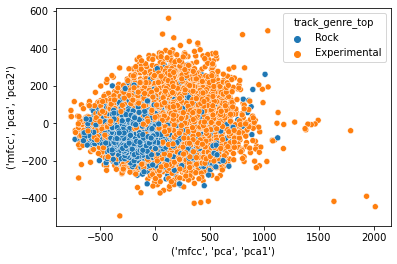

In [61]:
sns.scatterplot(x = features.loc[:,('mfcc','pca','pca1')], y = features.loc[:,('mfcc','pca','pca2')], hue = tracks.loc[rock | experimental, 'track_genre_top'])

In [62]:
tracks.loc[rock | experimental,'track_genre_top']

track_id
135               Rock
136               Rock
137       Experimental
138       Experimental
148       Experimental
              ...     
155315            Rock
155316            Rock
155317            Rock
155318            Rock
155319            Rock
Name: track_genre_top, Length: 24362, dtype: object

In [63]:
tracks.loc[rock | experimental,'track_genre_top'].value_counts()

Rock            13994
Experimental    10368
Name: track_genre_top, dtype: int64

In [64]:
tracks.loc[rock | experimental,'track_genre_top'].value_counts()/tracks.loc[rock | experimental,'track_genre_top'].value_counts().sum()

Rock            0.574419
Experimental    0.425581
Name: track_genre_top, dtype: float64

[Text(0.5, 1.0, 'Rock and Experimental genre distribution')]

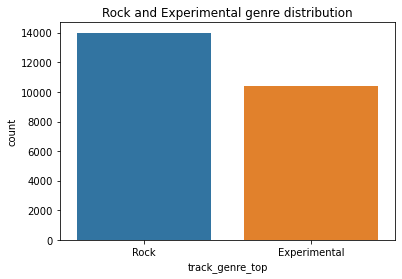

In [440]:
sns.countplot(x=tracks.loc[rock | experimental,'track_genre_top']).set(title='Rock and Experimental genre distribution')

In [66]:
features.columns.levels[0]

Index(['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

In [67]:
df_pca = pd.DataFrame({('a','b','c'):None}, index  = features.index)
for i in list(((x, 'pca',['pca1','pca2']) for x in features.columns.levels[0])):
    df_pca = df_pca.join(features.loc[:,i]).copy()
df_pca.drop('a', axis=1, inplace=True)
df_pca

chroma_cens           chroma_cqt           chroma_stft            \
                 pca                  pca                   pca             
                pca1      pca2       pca1      pca2        pca1      pca2   
track_id                                                                    
2           5.182417  1.419959   2.675890 -0.249346   -1.044548  1.621723   
3           1.751952  1.173604  -1.204043  1.273372   -1.699409 -1.217421   
5           0.617539 -1.165105  -0.930149 -1.050658   -1.804942  0.123830   
10          4.899287  1.578219  -0.387718 -0.227851    0.442356  0.016810   
134         0.891778  0.980471  -1.064859 -0.813434   -1.658033 -1.961948   
...              ...       ...        ...       ...         ...       ...   
155315     -1.668965 -0.158045  -0.257569 -0.289072   -1.388856 -1.856017   
155316      0.217939 -0.114734   1.316371  2.880541   -0.688394 -0.344246   
155317     -1.618226 -0.887089  -0.388593  1.015063   -1.437668 -1.375192   
155318      0.405435  1.500775  -0.501837 -0.196089   -0.986836 -1.244644   
155319     -0.248973 -1.058358  -1.064144 -0.575256   -0.902635 -1.335387   

                mfcc                 rmse           spectral_bandwidth  \
                 pca                  pca                          pca   
                pca1       pca2      pca1      pca2               pca1   
track_id                                                                 
2        -130.301499  42.065821 -0.030912  0.539646         216.896115   
3        -130.232128  53.683130 -3.185803 -3.552277         357.775816   
5          -7.335764  22.198618 -2.529013 -2.555140         143.207746   
10       -157.663730 -63.762850 -0.772360 -0.801135         -56.981032   
134       -16.224463  52.061673 -0.401209  0.270614        -187.429152   
...              ...        ...       ...       ...                ...   
155315    -17.964481 -67.187766 -2.810046 -1.838330        -184.089316   
155316    -30.088071 -82.528467 -1.365953 -1.915472        -361.623040   
155317     33.837405  -3.030859  2.100115 -0.989200        -392.312302   
155318    -27.754516 -28.163223  0.951760 -1.018765        -159.704370   
155319    -36.383249 -78.050792  0.984619 -0.935962          36.565386   

                     spectral_centroid             spectral_contrast  \
                                   pca                           pca   
                pca2              pca1        pca2              pca1   
track_id                                                               
2         -89.888408         29.008171  574.017639        -12.407614   
3        -109.824761        835.874023  543.538823        -11.593077   
5        -135.884847         63.322628   87.768960        -11.068496   
10       -573.831630        161.203878  110.241071         -6.836277   
134        -2.227277        -69.703197   50.926274         -6.985864   
...              ...               ...         ...               ...   
155315    390.575273        -96.920642 -207.105761         -9.321506   
155316     30.317666       -374.171736 -434.344177         -7.818726   
155317    388.555037      -2265.842938    4.586338         -3.579070   
155318    218.777755       -216.500240 -176.480787         -8.431579   
155319    220.558229        -99.698385 -101.999647        -13.796855   

                   spectral_rolloff                tonnetz            \
                                pca                    pca             
              pca2             pca1         pca2      pca1      pca2   
track_id                                                               
2         6.380747      1220.536876   -76.189934  0.542411  1.849266   
3         9.197240      1676.568478  -677.323878 -0.152710  0.795435   
5         0.670573       695.834463  -155.986211  2.355072  9.719805   
10        5.387772        29.071951  -880.290448  1.678656 -0.996960   
134       2.545363       -57.374513  -256.743481  6.565887  0.629563   
...          

Decision Tree

In [68]:
#using df_pca: PCA features
X = df_pca.loc[rock | experimental,:].values
y = tracks.loc[rock | experimental,'track_genre_top']

In [69]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=700, min_samples_leaf=100)

In [70]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7632 (+/- 0.05)
F1-score: 0.7585 (+/- 0.05)


selecting features with more influence on target variable wiht ANOVA

In [71]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [72]:
X = features.loc[rock | experimental,:]
y = tracks.loc[rock | experimental,'track_genre_top']

In [73]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all').fit(X, y)

In [74]:
dic = {}
for i in list(features):
    dic[i] = fs.scores_[list(features).index(i)]
dict(sorted(dic.items(), key=lambda item: item[1],reverse=True)[:20])

{('mfcc', 'median', '01'): 6589.974629409608,
 ('mfcc', 'mean', '01'): 6199.779730885728,
 ('mfcc', 'pca', 'pca1'): 5601.403004667474,
 ('mfcc', 'median', '03'): 4497.882409005878,
 ('mfcc', 'median', '04'): 4416.247098061984,
 ('mfcc', 'skew', '03'): 4313.477025920219,
 ('mfcc', 'mean', '04'): 4245.734629677708,
 ('mfcc', 'mean', '03'): 4229.327963918873,
 ('spectral_contrast', 'median', '07'): 3807.207397799591,
 ('spectral_contrast', 'mean', '07'): 3601.349403340539,
 ('spectral_contrast', 'pca', 'pca1'): 3420.1071759001343,
 ('mfcc', 'median', '06'): 3138.0164224098744,
 ('mfcc', 'skew', '01'): 3116.554591233083,
 ('mfcc', 'mean', '06'): 2855.430139207282,
 ('mfcc', 'pca', 'pca2'): 2752.1386180030454,
 ('mfcc', 'std', '15'): 2566.9373381639084,
 ('mfcc', 'std', '14'): 2493.7963190309797,
 ('mfcc', 'std', '16'): 2424.028308237776,
 ('mfcc', 'std', '13'): 2413.368822921873,
 ('spectral_contrast', 'std', '04'): 2361.2138173384915}

In [114]:
anova_attributes = dict(sorted(dic.items(), key=lambda item: item[1],reverse=True)).keys()

In [76]:
values = dict(sorted(dic.items(), key=lambda item: item[1],reverse=True)).values()

In [77]:
list(anova_attributes)[:10]

[('mfcc', 'median', '01'),
 ('mfcc', 'mean', '01'),
 ('mfcc', 'pca', 'pca1'),
 ('mfcc', 'median', '03'),
 ('mfcc', 'median', '04'),
 ('mfcc', 'skew', '03'),
 ('mfcc', 'mean', '04'),
 ('mfcc', 'mean', '03'),
 ('spectral_contrast', 'median', '07'),
 ('spectral_contrast', 'mean', '07')]

In [78]:
list(values)[:10]

[6589.974629409608,
 6199.779730885728,
 5601.403004667474,
 4497.882409005878,
 4416.247098061984,
 4313.477025920219,
 4245.734629677708,
 4229.327963918873,
 3807.207397799591,
 3601.349403340539]

In [79]:
pd.DataFrame(index=list(anova_attributes)[:10], data=list(values)[:10]).loc[:,0]

(mfcc, median, 01)                 6589.974629
(mfcc, mean, 01)                   6199.779731
(mfcc, pca, pca1)                  5601.403005
(mfcc, median, 03)                 4497.882409
(mfcc, median, 04)                 4416.247098
(mfcc, skew, 03)                   4313.477026
(mfcc, mean, 04)                   4245.734630
(mfcc, mean, 03)                   4229.327964
(spectral_contrast, median, 07)    3807.207398
(spectral_contrast, mean, 07)      3601.349403
Name: 0, dtype: float64

<AxesSubplot:xlabel='0'>

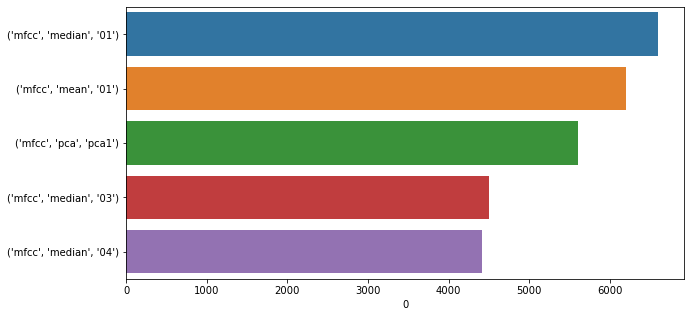

In [80]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=pd.DataFrame(index=list(anova_attributes)[:5], data=list(values)[:5]).loc[:,0], y = pd.DataFrame(index=list(anova_attributes)[:5], data=list(values)[:5]).index)

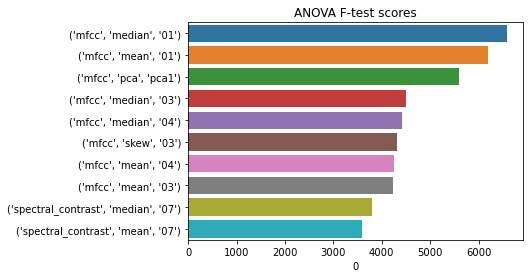

In [81]:
g=sns.barplot(x=pd.DataFrame(index=list(anova_attributes)[:10], data=list(values)[:10]).loc[:,0], y = pd.DataFrame(index=list(anova_attributes)[:10], data=list(values)[:10]).index)
g.set_title('ANOVA F-test scores')
plt.show()

In [917]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=300, min_samples_leaf=300)


In [918]:
#clf with best anova_attributes selected with ANOVA
X = features.loc[rock | experimental,list(anova_attributes)[:5]].values
y = tracks.loc[rock | experimental,'track_genre_top'].copy()

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7656 (+/- 0.06)
F1-score: 0.7595 (+/- 0.05)


In [749]:
X_train, X_validation, y_train, y_validation_dt = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation_dt, y_pred))
print('confusion matrix: \n',confusion_matrix(y_validation_dt, y_pred))
print(classification_report(y_validation_dt, y_pred))

train acc. :  0.6320398445624213
test acc. :  0.6342144147102282
confusion matrix: 
 [[2463  129]
 [2099 1400]]
              precision    recall  f1-score   support

Experimental       0.54      0.95      0.69      2592
        Rock       0.92      0.40      0.56      3499

    accuracy                           0.63      6091
   macro avg       0.73      0.68      0.62      6091
weighted avg       0.76      0.63      0.61      6091



In [750]:
dt_predict_proba = clf.predict_proba(X_validation)

<AxesSubplot:title={'center':'Decision Tree ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

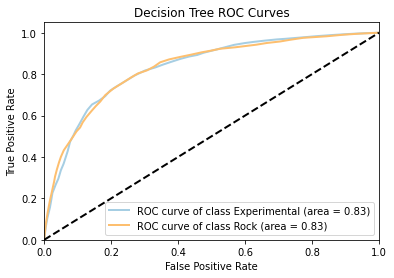

In [751]:
plot_roc(y_validation_dt, dt_predict_proba,plot_micro=False, plot_macro=False, cmap='Paired', title='Decision Tree ROC Curves')

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

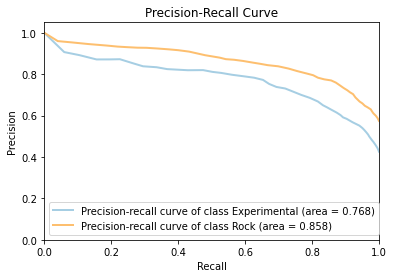

In [752]:
plot_precision_recall(y_validation_dt, dt_predict_proba,plot_micro=False, cmap='Paired')

In [93]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

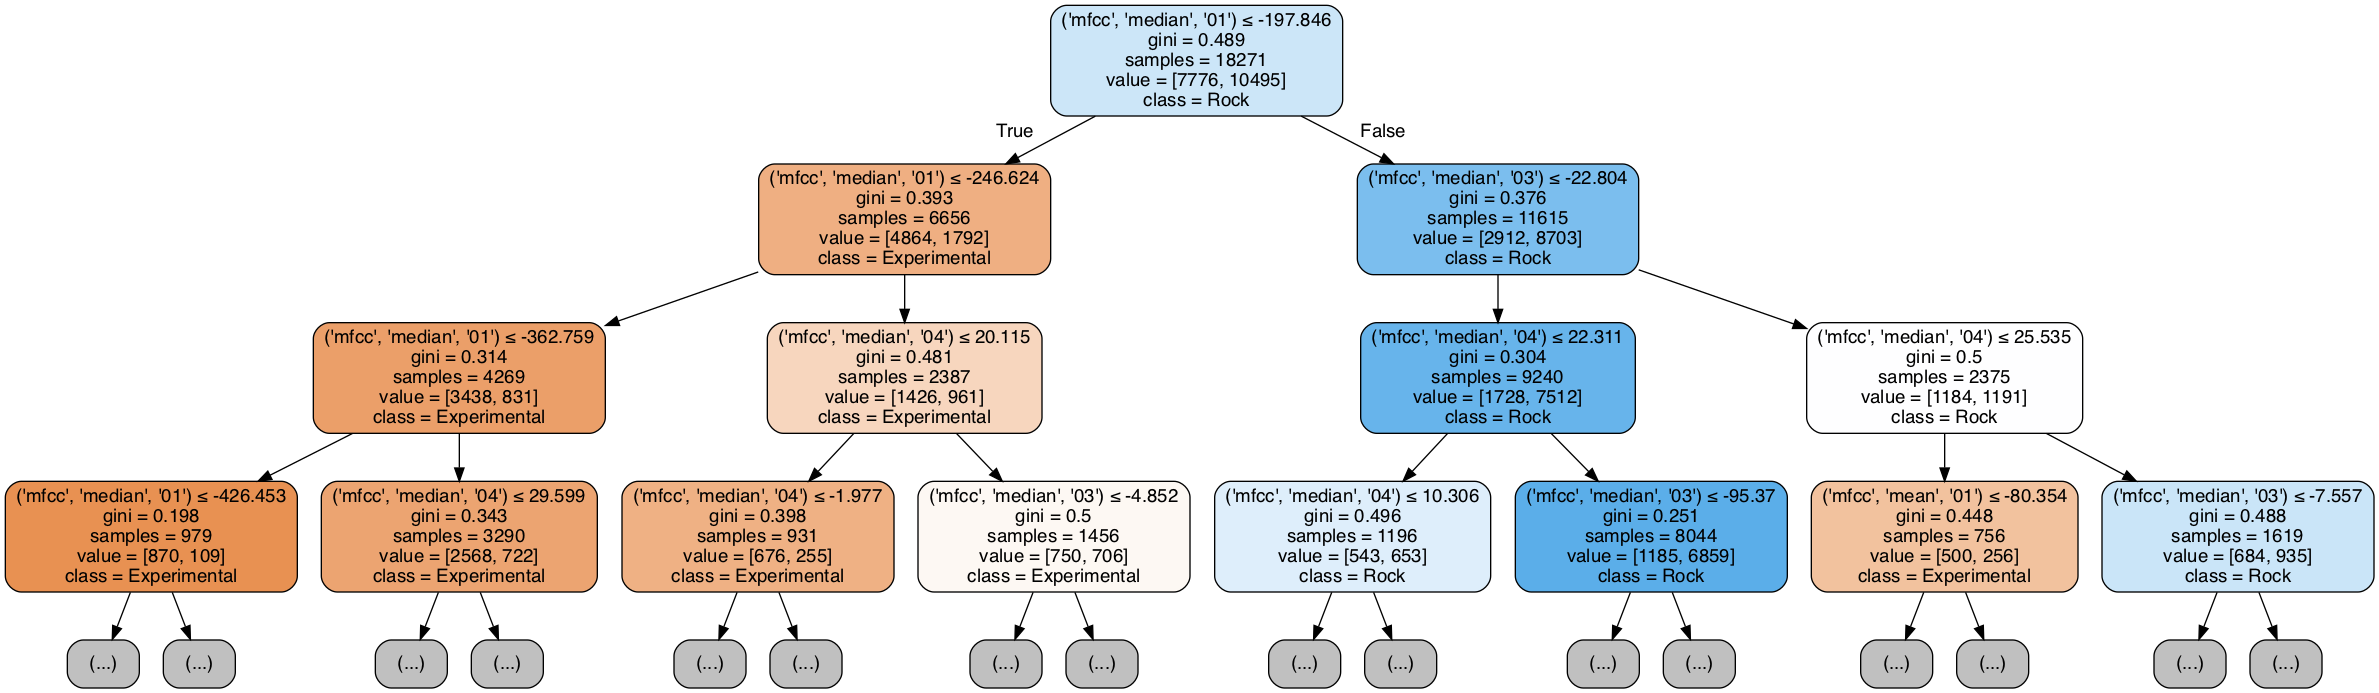

In [396]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(anova_attributes)[:5],
                                class_names= clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve

In [97]:
standardadized_data = skl.preprocessing.StandardScaler(copy=False).fit_transform(features.loc[rock | experimental,list(anova_attributes)[:40]].values)

In [98]:
clf = KNeighborsClassifier(n_neighbors=12)

#clf with best anova_attributes selected with ANOVA
X = standardadized_data
y = tracks.loc[rock | experimental,'track_genre_top'].copy()

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8104 (+/- 0.04)
F1-score: 0.7986 (+/- 0.04)


In [ ]:
"""
#finding best number of neighbours
def plot_validation_curve(classifier, parameter, param_range):
    train_scores, test_scores = validation_curve(
                                classifier,
                                X , y , 
                                param_name = parameter, 
                                param_range = param_range, cv = 3)
    train_means = np.mean(train_scores,axis=1)
    test_means = np.mean(test_scores,axis=1)
    plt.plot(param_range, train_means, label="Training score", color="orange")
    plt.plot(param_range, test_means, label="Cross-validation score", color='xkcd:lightish blue')
    plt.title("Validation Curve for {classifier}")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()
    
plot_validation_curve(KNeighborsClassifier(),'n_neighbors',(list(np.arange(1, 20,1))))
"""

In [99]:
X_train, X_validation, y_train, y_validation_knn = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation_knn, y_pred))
print('confusion matrix: \n',confusion_matrix(y_validation_knn, y_pred))
print(classification_report(y_validation_knn, y_pred))

train acc. :  0.8575337967270538
test acc. :  0.8363158758824495
confusion matrix: 
 [[1829  763]
 [ 234 3265]]
              precision    recall  f1-score   support

Experimental       0.89      0.71      0.79      2592
        Rock       0.81      0.93      0.87      3499

    accuracy                           0.84      6091
   macro avg       0.85      0.82      0.83      6091
weighted avg       0.84      0.84      0.83      6091



In [100]:
knn_predict_proba = clf.predict_proba(X_validation)

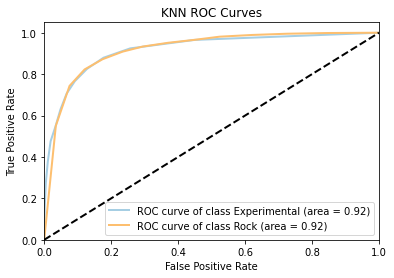

In [101]:
plot_roc(y_validation_knn, knn_predict_proba, plot_micro=False, plot_macro=False, cmap='Paired', text_fontsize='medium', title='KNN ROC Curves')
plt.show()

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

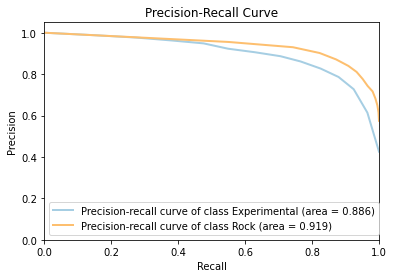

In [102]:
plot_precision_recall(y_validation_knn, knn_predict_proba,plot_micro=False, cmap='Paired')

In [ ]:
#pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_context("notebook", font_scale=1.1)

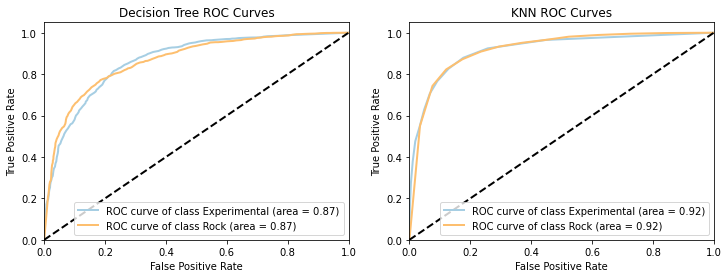

In [103]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))
plot_roc(y_validation_dt, dt_predict_proba,plot_micro=False, plot_macro=False, cmap='Paired', title='Decision Tree ROC Curves', ax= ax[0])
plot_roc(y_validation_knn, knn_predict_proba, plot_micro=False, plot_macro=False, cmap='Paired',  title='KNN ROC Curves', ax= ax[1])
plt.show()

In [ ]:
#classication on perfectly balanced dataset

In [ ]:
#trying to perfectly balance class because we noticed than even when classes have  a 57-43 % imbalance, the classifier are significantly better at classifying the majority class

In [441]:
r2drop = np.random.choice(features.loc[rock,:].index, 13994 - 10368, replace=False)

In [445]:
features_perf_balanced = features.drop(r2drop).copy()
tracks_perf_balanced = tracks.drop(r2drop).copy()

In [ ]:
tracks_imbalanced.loc[rock | experimental,'track_genre_top'].value_counts()

In [448]:
tracks_perf_balanced.loc[rock | experimental,'track_genre_top'].value_counts()

Experimental    10368
Rock            10368
Name: track_genre_top, dtype: int64

[Text(0.5, 1.0, 'Rock and Experimental genre distribution')]

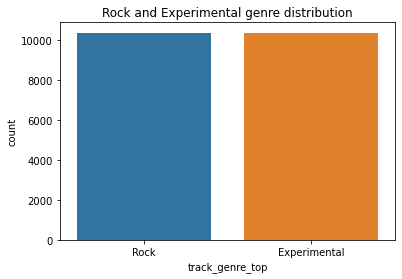

In [450]:
sns.countplot(x=tracks_perf_balanced.loc[rock | experimental,'track_genre_top']).set(title='Rock and Experimental genre distribution')

In [575]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=500, min_samples_leaf=300)

In [576]:
#clf with best anova_attributes selected with ANOVA
X = features_perf_balanced.loc[rock | experimental,list(anova_attributes)[:5]].values
y = tracks_perf_balanced.loc[rock | experimental,'track_genre_top'].copy()

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7607 (+/- 0.06)
F1-score: 0.7605 (+/- 0.06)


In [577]:
X_train, X_validation, y_train, y_validation_dt = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation_dt, y_pred))
print('confusion matrix: \n',confusion_matrix(y_validation_dt, y_pred))
print(classification_report(y_validation_dt, y_pred))

train acc. :  0.7658822016460906
test acc. :  0.7638888888888888
confusion matrix: 
 [[1923  669]
 [ 555 2037]]
              precision    recall  f1-score   support

Experimental       0.78      0.74      0.76      2592
        Rock       0.75      0.79      0.77      2592

    accuracy                           0.76      5184
   macro avg       0.76      0.76      0.76      5184
weighted avg       0.76      0.76      0.76      5184



In [578]:
dt_predict_proba = clf.predict_proba(X_validation)

<AxesSubplot:title={'center':'Decision Tree ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

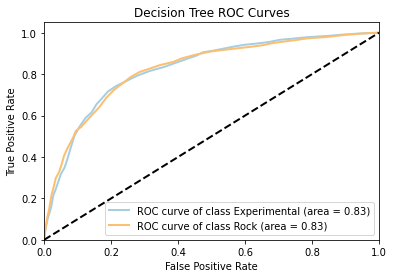

In [579]:
plot_roc(y_validation_dt, dt_predict_proba,plot_micro=False, plot_macro=False, cmap='Paired', title='Decision Tree ROC Curves')

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

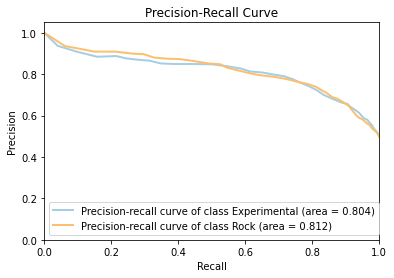

In [580]:
plot_precision_recall(y_validation_dt, dt_predict_proba,plot_micro=False, cmap='Paired')

In [581]:
#knn on perfectly balanced data

In [582]:
standardadized_data = skl.preprocessing.StandardScaler(copy=False).fit_transform(features_perf_balanced.loc[rock | experimental,list(anova_attributes)[:5]].values)

In [584]:
clf = KNeighborsClassifier(n_neighbors=12)

#clf with best anova_attributes selected with ANOVA
X = standardadized_data
y = tracks_perf_balanced.loc[rock | experimental,'track_genre_top'].copy()

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7529 (+/- 0.05)
F1-score: 0.7526 (+/- 0.05)


In [585]:
X_train, X_validation, y_train, y_validation_knn = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation_knn, y_pred))
print('confusion matrix: \n',confusion_matrix(y_validation_knn, y_pred))
print(classification_report(y_validation_knn, y_pred))

train acc. :  0.7917309670781894
test acc. :  0.7611882716049383
confusion matrix: 
 [[1992  600]
 [ 638 1954]]
              precision    recall  f1-score   support

Experimental       0.76      0.77      0.76      2592
        Rock       0.77      0.75      0.76      2592

    accuracy                           0.76      5184
   macro avg       0.76      0.76      0.76      5184
weighted avg       0.76      0.76      0.76      5184



In [586]:
knn_predict_proba = clf.predict_proba(X_validation)

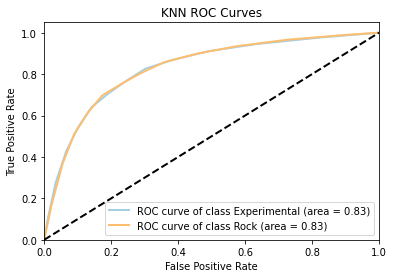

In [587]:
plot_roc(y_validation_knn, knn_predict_proba, plot_micro=False, plot_macro=False, cmap='Paired', text_fontsize='medium', title='KNN ROC Curves')
plt.show()

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

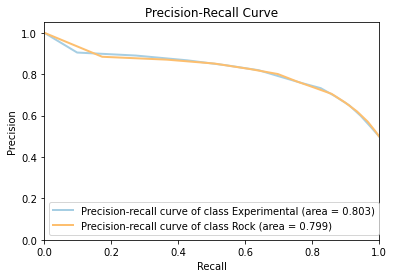

In [588]:
plot_precision_recall(y_validation_knn, knn_predict_proba,plot_micro=False, cmap='Paired')

#### 1.4 Analyze the value distribution of the class to predict with respect to point 2; if it is unbalanced leave it as it is, otherwise turn the dataset into an imbalanced version (e.g., 96% - 4%, for binary classification). Then solve the classification task using the Decision Tree or the KNN by adopting various techniques of imbalanced learning.

In [589]:
tracks.loc[rock | experimental,'track_genre_top'].value_counts()

Rock            13994
Experimental    10368
Name: track_genre_top, dtype: int64

In [590]:
tracks.loc[rock | experimental,'track_genre_top'].value_counts()/tracks.loc[rock | experimental,'track_genre_top'].value_counts().sum()

Rock            0.574419
Experimental    0.425581
Name: track_genre_top, dtype: float64

current distribution is 57% - 43%

<AxesSubplot:title={'center':'Top genres distritbution'}>

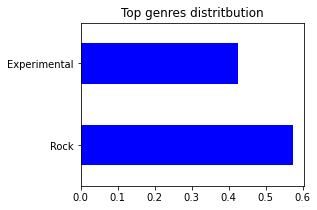

In [821]:
fig, ax = plt.subplots(figsize=(4,3))
(tracks.loc[rock | experimental,'track_genre_top'].value_counts()/tracks.loc[rock | experimental,'track_genre_top'].value_counts().sum()).plot(kind='barh', title = 'Top genres distritbution',color = 'blue')

<AxesSubplot:>

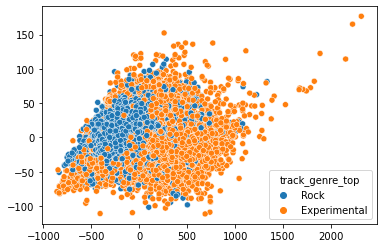

In [955]:
pca_data = skl.decomposition.PCA(n_components=2).fit_transform(features.loc[rock | experimental,list(attributes)[:5]])
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1], hue= tracks.loc[rock | experimental,'track_genre_top'])

In [822]:
features.loc[experimental,:]

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
137           1.607191  1.199649  0.745765  1.430835 -0.155455  0.768487   
138           1.501403  0.957514  1.276685  0.640389  0.442936  0.845533   
148          -0.453950 -0.922267 -0.845767 -1.059609 -0.164252 -0.428238   
149          -0.386733 -0.545598 -0.638649 -0.669786 -0.522530 -0.809405   
150          -0.083043  0.142131 -0.466703  1.447829 -0.324532  0.098253   
...                ...       ...       ...       ...       ...       ...   
155308        0.647675  1.058561  1.654950  0.990346 -0.044517 -0.307191   
155309        0.189282  1.264533 -0.444038 -0.459433 -0.573004 -0.532477   
155310        0.124136  0.958202  0.025537  0.064289 -0.141923 -0.094744   
155311       -1.027373 -0.229646  0.624100 -0.391486 -0.803758  0.234361   
155312        1.952062  2.133418  0.932344  1.576211  1.812186  2.722217   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
137         3.005594  2.779431  1.567088  2.431861  1.118796  0.468004   
138         0.917440  0.770691  1.787260  5.555072  1.148651  0.634510   
148        -1.483532 -1.171610 -1.154401 -1.209550 -1.084518  1.987128   
149        -0.814669 -0.304319 -0.238370 -0.208790  0.133114 -0.677182   
150        -0.560927 -0.524895 -0.277307 -0.467008  0.115648 -0.331481   
...              ...       ...       ...       ...       ...       ...   
155308      0.791535  0.338214  1.760819  1.728233 -0.604068  0.949890   
155309     -0.358901 -0.905645 -0.005152 -0.737950 -0.537926  0.135490   
155310      0.225809 -0.576170 -0.152995  0.319955 -0.153863  0.392059   
155311     -0.615932 -0.782443 -0.859084  1.525125 -1.073653 -1.030178   
155312      2.196095  0.857059  0.923653  1.222566  0.024139  2.289395   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
137         0.633678  0.625258  0.601427  0.660026  0.598722  0.592455   
138         0.615255  0.562965  0.605451  0.607131  0.662495  0.584011   
148         0.562990  0.474745  0.457034  0.488603  0.625555  0.691539   
149         0.676652  0.666299  0.683681  0.663710  0.500822  0.675081   
150         0.571298  0.655977  0.670337  0.689834  0.686940  0.721757   
...              ...       ...       ...       ...       ...       ...   
155308      0.589292  0.585794  0.591462  0.642272  0.601671  0.598286   
155309      0.680586  0.648077  0.489377  0.656758  0.687168  0.572658   
155310      0.654691  0.659332  0.653887  0.494561  0.689659  0.626979   
155311      0.639231  0.633579  0.702154  0.678706  0.657247  0.694097   
155312      0.683668  0.595843  0.587984  0.605333  0.531490  0.491442   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
137         0.629381  0.624669  0.572818  0.576567  0.537102  0.545529   
138         0.613897  0.564842  0.661057  0.705364  0.616068  0.550070   
148         0.696929  0.691866  0.693128  0.697424  0.641272  0.703273   
149         0.569586  0.599286  0.590378  0.685681  0.677828  0.657589   
150         0.648433  0.690800  0.512362  0.5

In [823]:
rows2drop = np.random.choice(features.loc[experimental,:].index, 10368 - 583, replace=False)

In [824]:
len(features.loc[experimental,:]), len(rows2drop)

(10368, 9785)

In [825]:
#new datasets (features & tracks) where we removed 9754 rows with "experimental" genre top.
features_imbalanced = features.drop(rows2drop).copy()
tracks_imbalanced = tracks.drop(rows2drop).copy()

In [826]:
tracks_imbalanced = tracks.drop(rows2drop).copy()

In [827]:
tracks_imbalanced.loc[rock | experimental,'track_genre_top'].value_counts()

Rock            13994
Experimental      583
Name: track_genre_top, dtype: int64

In [828]:
tracks_imbalanced.loc[rock | experimental,'track_genre_top'].value_counts()/tracks_imbalanced.loc[rock | experimental,'track_genre_top'].value_counts().sum()

Rock            0.960005
Experimental    0.039995
Name: track_genre_top, dtype: float64

#### Classificationon imbalanced data

In [300]:
##### KNN

In [638]:
#standardized data for KNN 
standardadized_data = skl.preprocessing.StandardScaler(copy=False).fit_transform(features_imbalanced.loc[rock | experimental,list(anova_attributes)[:5]].values)

In [678]:
clf = KNeighborsClassifier(n_neighbors=5)
#clf with best anova_attributes selected with ANOVA
X = standardadized_data
y = tracks_imbalanced.loc[rock | experimental,'track_genre_top']

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9575 (+/- 0.00)
F1-score: 0.5299 (+/- 0.03)


In [679]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('test f1 : ', f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9620699794178182
test acc. :  0.958161865569273
test f1 :  [0.11594203 0.97857394]
test f1 :  0.11594202898550726
confusion matrix: 
 [[  12  163]
 [  20 4179]]
              precision    recall  f1-score   support

Experimental       0.38      0.07      0.12       175
        Rock       0.96      1.00      0.98      4199

    accuracy                           0.96      4374
   macro avg       0.67      0.53      0.55      4374
weighted avg       0.94      0.96      0.94      4374



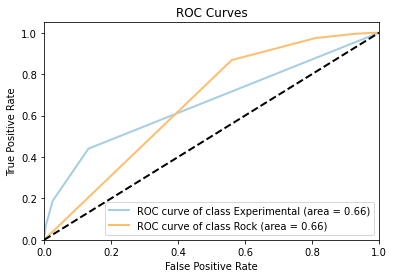

In [661]:
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired')
plt.show()

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

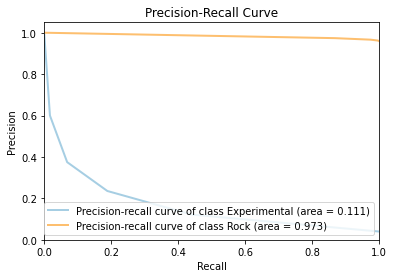

In [680]:
plot_precision_recall(y_validation, clf.predict_proba(X_validation),plot_micro=False, cmap='Paired', classes_to_plot=['Experimental','Rock'])

f1=0.139 auc=0.319


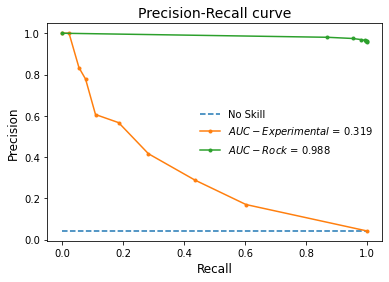

In [1430]:
y_score = clf.predict_proba(X_validation)
lr_precision, lr_recall, _ = precision_recall_curve(y_validation, y_score[:, 0], pos_label='Experimental')
lr_precision0, lr_recall0, _ = precision_recall_curve(y_validation, y_score[:, 1], pos_label='Rock')
# calculate scores
lr_f1, lr_auc = f1_score(y_validation, y_pred, pos_label='Experimental'), auc(lr_recall, lr_precision)
lr_f10, lr_auc0 = f1_score(y_validation, y_pred, pos_label='Experimental'), auc(lr_recall0, lr_precision0)

# summarize scores
print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_validation[y_validation=='Experimental']) / len(y_validation)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='$AUC- Experimental$ = %.3f' % (lr_auc))
pyplot.plot(lr_recall0, lr_precision0, marker='.', label='$AUC- Rock$ = %.3f' % (lr_auc0))

# axis labels
pyplot.xlabel('Recall',fontsize=12)
pyplot.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall curve', fontsize=14)
# show the legend
pyplot.legend(frameon=False)
# show the plot
pyplot.show()

<AxesSubplot:>

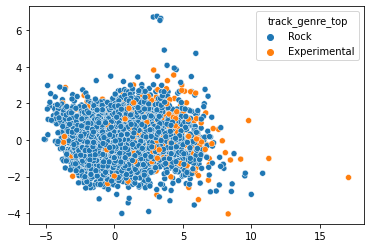

In [681]:
pca_data = skl.decomposition.PCA(n_components=2).fit_transform(X_train)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1], hue= y_train)

In [706]:
clf = DecisionTreeClassifier(min_samples_split=5)

#clf with best anova_attributes selected with ANOVA
X = features_imbalanced.loc[rock | experimental,list(anova_attributes)[:5]].values
y = tracks_imbalanced.loc[rock | experimental,'track_genre_top']


scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.9269 (+/- 0.02)
F1-score: 0.5695 (+/- 0.04)


In [707]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9923551896501029
test acc. :  0.9352994970278921
test f1 :  [0.2028169  0.96628142]
confusion matrix: 
 [[  36  139]
 [ 144 4055]]
              precision    recall  f1-score   support

Experimental       0.20      0.21      0.20       175
        Rock       0.97      0.97      0.97      4199

    accuracy                           0.94      4374
   macro avg       0.58      0.59      0.58      4374
weighted avg       0.94      0.94      0.94      4374



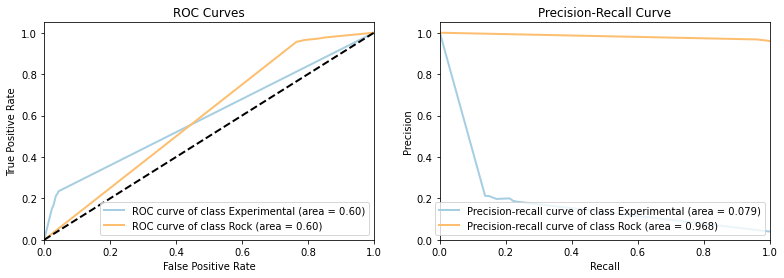

In [718]:
fig, ax = plt.subplots(1,2, figsize=(13,4))
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired', ax = ax[0])
plot_precision_recall(y_validation, clf.predict_proba(X_validation),plot_micro=False, cmap='Paired', classes_to_plot=['Experimental','Rock'], ax = ax[1] )
plt.show()

#### option0: class weights

In [933]:
#clf with best list(anova_attributes)[:40] selected with ANOVA
X = features_imbalanced.loc[rock | experimental,list(anova_attributes)[:5]].values
y = tracks_imbalanced.loc[rock | experimental,'track_genre_top']

In [934]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [935]:
clf = DecisionTreeClassifier(min_samples_split=5, class_weight={'Experimental':1,'Rock':10})

In [936]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('test f1 : ', f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9893168675879643
test acc. :  0.9382716049382716
test f1 :  [0.18674699 0.96791825]
test f1 :  0.18674698795180725
confusion matrix: 
 [[  31  144]
 [ 126 4073]]
              precision    recall  f1-score   support

Experimental       0.20      0.18      0.19       175
        Rock       0.97      0.97      0.97      4199

    accuracy                           0.94      4374
   macro avg       0.58      0.57      0.58      4374
weighted avg       0.94      0.94      0.94      4374



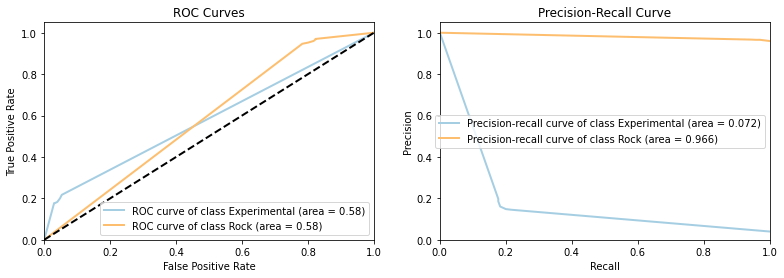

In [937]:
fig, ax = plt.subplots(1,2, figsize=(13,4))
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired', ax = ax[0])
plot_precision_recall(y_validation, clf.predict_proba(X_validation),plot_micro=False, cmap='Paired', classes_to_plot=['Experimental','Rock'], ax = ax[1] )
plt.show()


In [941]:
clf = DecisionTreeClassifier(min_samples_split=5, class_weight={'Experimental':10,'Rock':1})

In [942]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('test f1 : ', f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9905910026462805
test acc. :  0.9190672153635117
test f1 :  [0.13658537 0.95754378]
test f1 :  0.13658536585365855
confusion matrix: 
 [[  28  147]
 [ 207 3992]]
              precision    recall  f1-score   support

Experimental       0.12      0.16      0.14       175
        Rock       0.96      0.95      0.96      4199

    accuracy                           0.92      4374
   macro avg       0.54      0.56      0.55      4374
weighted avg       0.93      0.92      0.92      4374



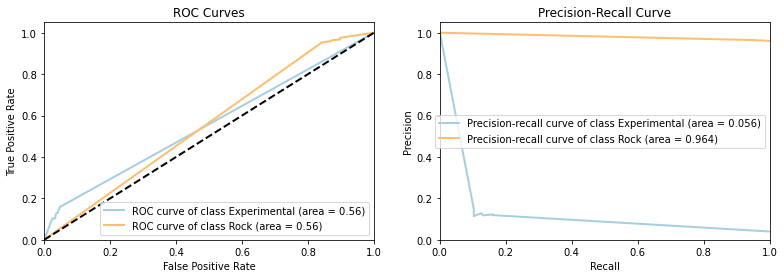

In [943]:
fig, ax = plt.subplots(1,2, figsize=(13,4))
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired', ax = ax[0])
plot_precision_recall(y_validation, clf.predict_proba(X_validation),plot_micro=False, cmap='Paired', classes_to_plot=['Experimental','Rock'], ax = ax[1] )
plt.show()

In [714]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('test f1 : ', f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9921591688719005
test acc. :  0.9346136259716507
test f1 :  [0.20555556 0.96590367]
test f1 :  0.20555555555555555
confusion matrix: 
 [[  37  138]
 [ 148 4051]]
              precision    recall  f1-score   support

Experimental       0.20      0.21      0.21       175
        Rock       0.97      0.96      0.97      4199

    accuracy                           0.93      4374
   macro avg       0.58      0.59      0.59      4374
weighted avg       0.94      0.93      0.94      4374



In [950]:
clf = DecisionTreeClassifier()

In [951]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ', f1_score(y_validation, y_pred, average=None))
print('test f1 : ', f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  1.0
test acc. :  0.9298125285779607
test f1 :  [0.14005602 0.96341318]
test f1 :  0.1400560224089636
confusion matrix: 
 [[  25  150]
 [ 157 4042]]
              precision    recall  f1-score   support

Experimental       0.14      0.14      0.14       175
        Rock       0.96      0.96      0.96      4199

    accuracy                           0.93      4374
   macro avg       0.55      0.55      0.55      4374
weighted avg       0.93      0.93      0.93      4374



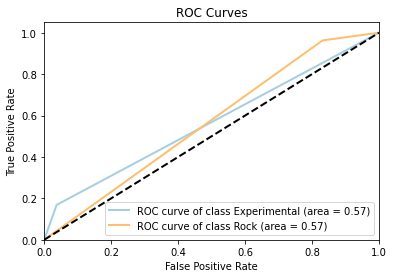

In [1611]:
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired')
plt.show()

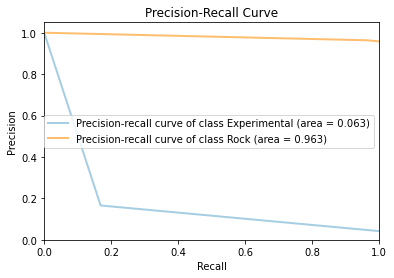

In [1612]:
plot_precision_recall(y_validation, clf.predict_proba(X_validation), plot_micro=False, cmap='Paired')
plt.show()

In [126]:
from collections import Counter

#### option1:  undersampling with Condensed Nearest Neighbour (removing majority points having as KNN a minority point)

In [1534]:
#unfeasable due to high processing time. Plus doing oversample is preferrable

In [298]:
print('Original imbalanced dataset shape %s' % Counter(y_train))

Original imbalanced dataset shape Counter({'Rock': 9795, 'Experimental': 430})


In [128]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [945]:
%%time
cnn = CondensedNearestNeighbour(sampling_strategy='majority', random_state=42, n_neighbors=None, n_seeds_S=1)
X_res, y_res = cnn.fit_resample(X_train[:5000], y_train[:5000])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Rock': 541, 'Experimental': 224})
CPU times: user 3min 9s, sys: 16.1 s, total: 3min 26s
Wall time: 2min 57s


In [884]:
X_res

array([[-1.79026547, -1.99318508,  1.79861222, ..., -2.89341682,
        -1.52887313, -0.18936707],
       [-3.37718143, -3.31053957,  3.12954073, ..., -0.55766033,
        -1.73426383, -0.17900486],
       [ 0.51131414,  0.67788162, -0.99277754, ...,  0.09073803,
        -0.16653401,  0.45064013],
       ...,
       [-1.29032719, -1.19504331,  0.92165934, ..., -1.55804998,
        -0.92476522,  1.04173225],
       [ 0.31230813,  0.23563284, -0.28999882, ...,  0.99841995,
        -0.06420934, -0.03702801],
       [ 0.50729554,  0.61025214, -0.52141715, ...,  0.68944716,
        -0.02260135, -0.79559757]])

In [877]:
len(X_train)

10225

In [946]:
y_train.value_counts()

Rock            9795
Experimental     430
Name: track_genre_top, dtype: int64

In [ ]:
pca_data = features_imbalanced.loc[rock | experimental, list(anova_attributes)[:40]]
pca_data = skl.decomposition.PCA(n_components=2).fit_transform(pca_data)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1], hue= tracks_imbalanced.loc[rock | experimental, 'track_genre_top'])

<AxesSubplot:>

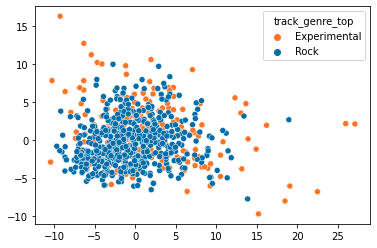

In [948]:
pca_data = skl.decomposition.PCA(n_components=2).fit_transform(X_res)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1], hue= y_res, palette=sns.color_palette(["#FF7425","#006CA8"]))   

#### option2: oversampling with SMOTE

In [957]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [958]:
standardadized_data = skl.preprocessing.StandardScaler(copy=False).fit_transform(features_imbalanced.loc[rock | experimental,list(anova_attributes)[:5]].values)

In [959]:
X = standardadized_data
#X = features_imbalanced.loc[rock | experimental,list(anova_attributes)[:5]].values
y = tracks_imbalanced.loc[rock | experimental,'track_genre_top']

In [960]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [961]:
sm = SMOTE(random_state=42)
#sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Rock': 9795, 'Experimental': 9795})


In [962]:
y_train.value_counts()

Rock            9795
Experimental     408
Name: track_genre_top, dtype: int64

In [963]:
y_res.value_counts()

Rock            9795
Experimental    9795
Name: track_genre_top, dtype: int64

[Text(0.5, 1.0, 'raw imbalanced training set')]

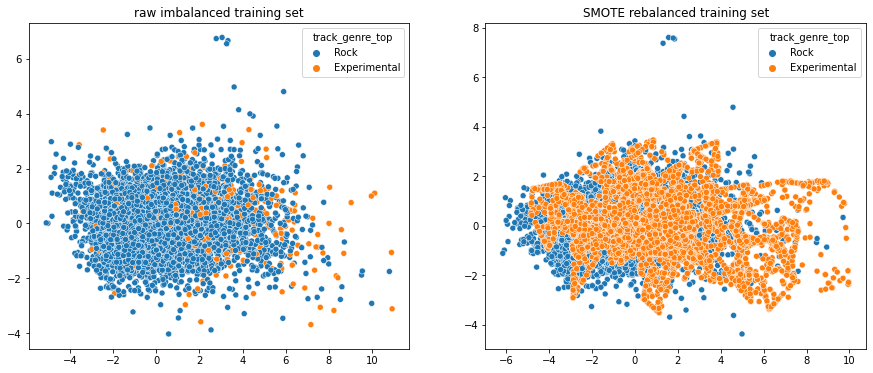

In [964]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
pca_data_1 = skl.decomposition.PCA(n_components=2).fit_transform(X_res)
sns.scatterplot(x=pca_data_1[:,0],y=pca_data_1[:,1], hue= y_res,  ax= ax[1]).set(title='SMOTE rebalanced training set')
pca_data2 = skl.decomposition.PCA(n_components=2).fit_transform(X_train)
sns.scatterplot(x=pca_data2[:,0],y=pca_data2[:,1], hue= y_train, ax= ax[0]).set(title='raw imbalanced training set')

In [914]:
#KNN
clf = KNeighborsClassifier(n_neighbors=12)
clf = clf.fit(X_res, y_res)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.814564343820445
test acc. :  0.7729766803840878
confusion matrix: 
 [[ 109   66]
 [ 927 3272]]
              precision    recall  f1-score   support

Experimental       0.11      0.62      0.18       175
        Rock       0.98      0.78      0.87      4199

    accuracy                           0.77      4374
   macro avg       0.54      0.70      0.52      4374
weighted avg       0.95      0.77      0.84      4374



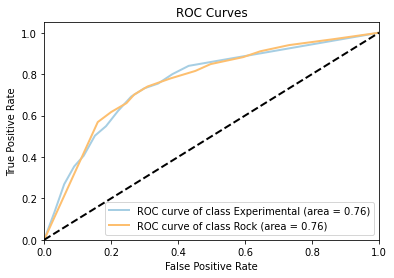

In [915]:
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired')
plt.show()

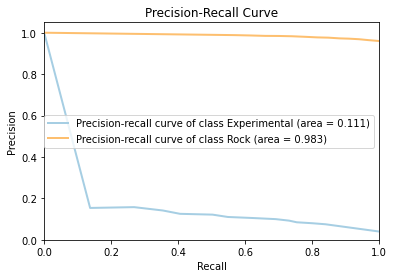

In [916]:
plot_precision_recall(y_validation, clf.predict_proba(X_validation), plot_micro=False, cmap='Paired')
plt.show()

In [870]:
#decisiontree with SMOTE
clf = DecisionTreeClassifier(min_samples_split=5)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = clf.fit(X_res, y_res)
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))
print('test f1 : ',f1_score(y_validation, y_pred, pos_label='Experimental'))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

train acc. :  0.9860825247476233
test acc. :  0.8516232281664381
test f1 :  0.1668806161745828
confusion matrix: 
 [[  65  110]
 [ 539 3660]]
              precision    recall  f1-score   support

Experimental       0.11      0.37      0.17       175
        Rock       0.97      0.87      0.92      4199

    accuracy                           0.85      4374
   macro avg       0.54      0.62      0.54      4374
weighted avg       0.94      0.85      0.89      4374



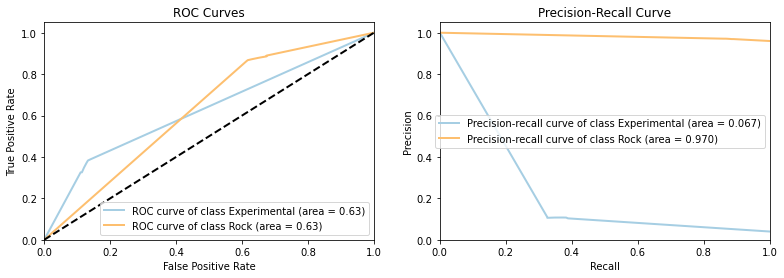

In [871]:
fig, ax = plt.subplots(1,2, figsize=(13,4))
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired', ax = ax[0])
plot_precision_recall(y_validation, clf.predict_proba(X_validation),plot_micro=False, cmap='Paired', classes_to_plot=['Experimental','Rock'], ax = ax[1] )
plt.show()

# Adjust the Decision Threshold

In [1657]:
y_pred

array(['Rock', 'Rock', 'Rock', ..., 'Rock', 'Rock', 'Rock'], dtype='<U12')

In [1671]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_validation)[:, 0]
    return np.array(['Experimental' if y > thr else 'Rock' for y in y_score])

In [1728]:
y_pred = adjusted_predict(X_validation, thr=0.5)

In [1729]:
print('Accuracy %s' % accuracy_score(y_validation, y_pred))
print('F1-score %s' % f1_score(y_validation, y_pred, average=None))
print('confusion matrix: \n',confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

Accuracy 0.9237964864248231
F1-score [0.28632479 0.95974934]
confusion matrix: 
 [[  67  117]
 [ 217 3982]]
              precision    recall  f1-score   support

Experimental       0.24      0.36      0.29       184
        Rock       0.97      0.95      0.96      4199

    accuracy                           0.92      4383
   macro avg       0.60      0.66      0.62      4383
weighted avg       0.94      0.92      0.93      4383



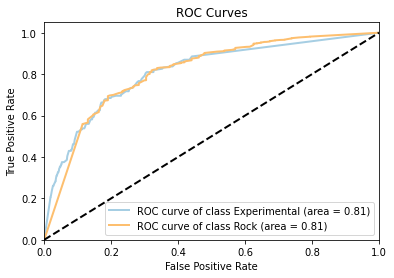

In [1670]:
plot_roc(y_validation, clf.predict_proba(X_validation), plot_micro=False, plot_macro=False, cmap='Paired')
plt.show()

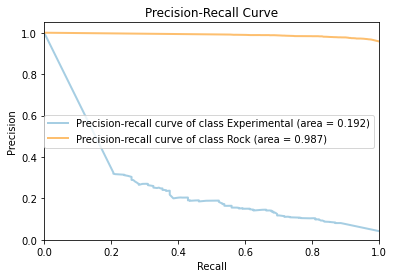

In [1667]:
plot_precision_recall(y_validation, clf.predict_proba(X_validation), plot_micro=False, cmap='Paired')
plt.show()